# Case Study 4: Customer Segmentation for E-commerce
# Problem Statement:
# You have a dataset containing customer information, including purchase history and demographics. Perform the following tasks:

# Load and explore the dataset.
# Clean and preprocess the data.
# Perform customer segmentation based on purchasing behavior.
# Analyze the characteristics of each customer segment.
# Provide insights and recommendations for targeted marketing.

In [73]:
dataset = {
    "customer_id": [1, 2, 3, 4, 5],
    "age": [35, 28, 40, 45, 30],
    "gender": ["Male", "Female", "Male", "Female", "Female"],
    "income": [50000, 75000, 60000, 80000, 55000],
    "purchase_history": [
        {"product_id": 101, "category": "electronics", "amount": 300},
        {"product_id": 102, "category": "clothing", "amount": 450},
        {"product_id": 103, "category": "electronics", "amount": 200},
        {"product_id": 104, "category": "cosmetics", "amount": 800},
        {"product_id": 105, "category": "clothing", "amount": 100}
    ]
}


In [74]:
import pandas as pd
import matplotlib.pyplot as plt


In [75]:
df = pd.DataFrame(dataset)
df

,customer_id,age,gender,income,purchase_history
0,1,35,Male,50000,"{'product_id': 101, 'category': 'electronics',..."
1,2,28,Female,75000,"{'product_id': 102, 'category': 'clothing', 'a..."
2,3,40,Male,60000,"{'product_id': 103, 'category': 'electronics',..."
3,4,45,Female,80000,"{'product_id': 104, 'category': 'cosmetics', '..."
4,5,30,Female,55000,"{'product_id': 105, 'category': 'clothing', 'a..."


In [76]:
df.isnull().sum()

customer_id         0
age                 0
gender              0
income              0
purchase_history    0
dtype: int64

In [77]:
df.dropna()

,customer_id,age,gender,income,purchase_history
0,1,35,Male,50000,"{'product_id': 101, 'category': 'electronics',..."
1,2,28,Female,75000,"{'product_id': 102, 'category': 'clothing', 'a..."
2,3,40,Male,60000,"{'product_id': 103, 'category': 'electronics',..."
3,4,45,Female,80000,"{'product_id': 104, 'category': 'cosmetics', '..."
4,5,30,Female,55000,"{'product_id': 105, 'category': 'clothing', 'a..."


In [78]:
df.head()

,customer_id,age,gender,income,purchase_history
0,1,35,Male,50000,"{'product_id': 101, 'category': 'electronics',..."
1,2,28,Female,75000,"{'product_id': 102, 'category': 'clothing', 'a..."
2,3,40,Male,60000,"{'product_id': 103, 'category': 'electronics',..."
3,4,45,Female,80000,"{'product_id': 104, 'category': 'cosmetics', '..."
4,5,30,Female,55000,"{'product_id': 105, 'category': 'clothing', 'a..."


In [79]:
df['purchase_amount'] = [purchase['amount'] for purchase in df['purchase_history']]
df



,customer_id,age,gender,income,purchase_history,purchase_amount
0,1,35,Male,50000,"{'product_id': 101, 'category': 'electronics',...",300
1,2,28,Female,75000,"{'product_id': 102, 'category': 'clothing', 'a...",450
2,3,40,Male,60000,"{'product_id': 103, 'category': 'electronics',...",200
3,4,45,Female,80000,"{'product_id': 104, 'category': 'cosmetics', '...",800
4,5,30,Female,55000,"{'product_id': 105, 'category': 'clothing', 'a...",100


In [80]:
median_purchase_amount = df['purchase_amount'].median()
segments = []
for amount in df['purchase_amount']:
    if amount > median_purchase_amount:
        segments.append('High Spender')
    else:
        segments.append('Low Spender')
df['segment'] = segments
df

,customer_id,age,gender,income,purchase_history,purchase_amount,segment
0,1,35,Male,50000,"{'product_id': 101, 'category': 'electronics',...",300,Low Spender
1,2,28,Female,75000,"{'product_id': 102, 'category': 'clothing', 'a...",450,High Spender
2,3,40,Male,60000,"{'product_id': 103, 'category': 'electronics',...",200,Low Spender
3,4,45,Female,80000,"{'product_id': 104, 'category': 'cosmetics', '...",800,High Spender
4,5,30,Female,55000,"{'product_id': 105, 'category': 'clothing', 'a...",100,Low Spender


In [81]:
p = pd.crosstab(df['segment'],df['gender'])
p

gender,Female,Male
segment,,
High Spender,2,0
Low Spender,1,2


<Axes: xlabel='gender', ylabel='segment'>

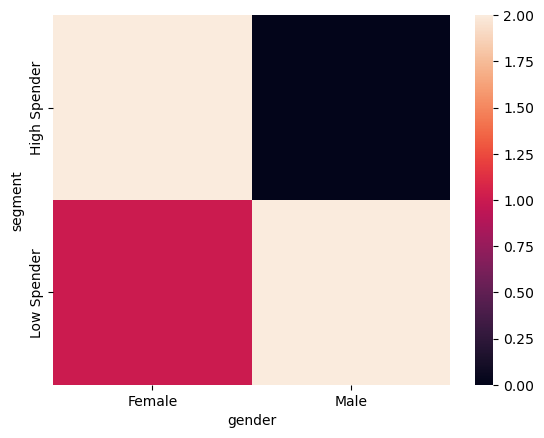

In [82]:
import seaborn as sns
sns.heatmap(p)